# Data Analysis - covid19

* Data download
* Data wrangling
* Data plot

### Remarks:
* convert DateRep to pd date format
* set 'Date' as index

In [1]:
import numpy as np
import pandas as pd
import os
import datetime
import sys
import urllib.request

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
# ----------------------- Download file -----------------------
# format: 
# https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-22.xlsx


def check_directory(cwd):
    return os.access(cwd, os.F_OK or os.X_OK or os.R_OK | os.W_OK) 

def check_existence(file_name):
    return os.path.isfile(file_name)


def get_link_and_filename():
    prefix = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-'
    file_ending = '.xlsx'
    file_date = datetime.datetime.now().strftime("%Y-%m-%d")
    
    link_str = prefix + file_date + file_ending
    file_name = "COVID-19-geographic-disbtribution-worldwide-" + file_date + file_ending
    #print(link_str)
    #print(file_name)
    return link_str, file_name


def file_download():
    
    cwd = os.getcwd()
    link, file_name = get_link_and_filename()
        
    if check_directory(cwd):
        print(f"Work directory ( {cwd} ) is OK")
        if check_existence(file_name):
            print(f"File ( {file_name} ) already exists")
        else:
            urllib.request.urlretrieve(link, file_name)

        
get_link_and_filename()
file_download()

Work directory ( /home/olli/Jupyter_Notebook/Covid_DataAnalyis ) is OK
File ( COVID-19-geographic-disbtribution-worldwide-2020-03-22.xlsx ) already exists


In [3]:
# ----------------------- Read file / create pandas dataframe -----------------------
    
cwd = os.getcwd()
link, file_name = get_link_and_filename()

# instance on xlsx file
xlsx = pd.ExcelFile(file_name)
# read instance to pandas dataframe
df = pd.read_excel(xlsx, parse_dates=True)

# convert date to correct pd datetime format
df['DateRep'] = pd.to_datetime(df.DateRep)

# set date as index
df.set_index('DateRep', inplace=True)

# change order for timeseries
df.sort_values(by='DateRep')

,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId
DateRep,,,,,,,
2019-12-31,31,12,2019,0,0,North_Macedonia,MK
2019-12-31,31,12,2019,0,0,Azerbaijan,AZ
2019-12-31,31,12,2019,0,0,Singapore,SG
2019-12-31,31,12,2019,0,0,Brazil,BR
2019-12-31,31,12,2019,0,0,Kuwait,KW
...,...,...,...,...,...,...,...
2020-03-22,22,3,2020,0,0,Jersey,JE
2020-03-22,22,3,2020,39,1,Japan,JP
2020-03-22,22,3,2020,1,0,Zimbabwe,ZW


In [4]:
# ----------------------- Data wrangling -----------------------
# net necessary yet !?!

# check data
index = df.index
columns = df.columns
values = df.values

display(type)
display(columns)
display(index)
display(values)
# display(type(df['DateRep']))
# df['DateRep'].dtype

type

Index(['Day', 'Month', 'Year', 'Cases', 'Deaths', 'Countries and territories',
       'GeoId'],
      dtype='object')

DatetimeIndex(['2020-03-22', '2020-03-21', '2020-03-20', '2020-03-19',
               '2020-03-18', '2020-03-17', '2020-03-16', '2020-03-15',
               '2020-03-11', '2020-03-08',
               ...
               '2020-01-03', '2020-01-02', '2020-01-01', '2019-12-31',
               '2020-03-22', '2020-03-21', '2020-03-20', '2020-03-19',
               '2020-03-22', '2020-03-21'],
              dtype='datetime64[ns]', name='DateRep', length=6188, freq=None)

array([[22, 3, 2020, ..., 0, 'Afghanistan', 'AF'],
       [21, 3, 2020, ..., 0, 'Afghanistan', 'AF'],
       [20, 3, 2020, ..., 0, 'Afghanistan', 'AF'],
       ...,
       [19, 3, 2020, ..., 0, 'Zambia', 'ZM'],
       [22, 3, 2020, ..., 0, 'Zimbabwe', 'ZW'],
       [21, 3, 2020, ..., 0, 'Zimbabwe', 'ZW']], dtype=object)

## Plotting Data

### Plotting Timeseries

### Plotting cumulative sum 

Text(0.5, 1.0, 'Italy - cumulative sum ')

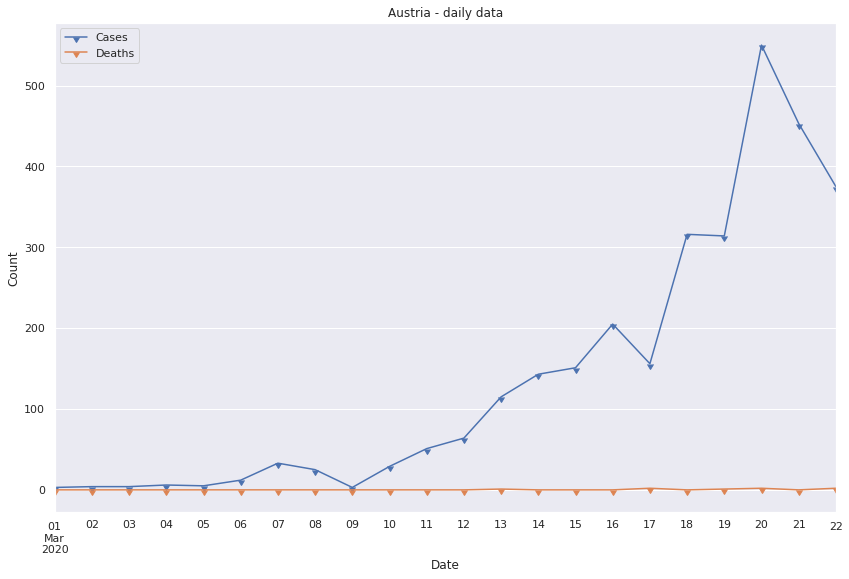

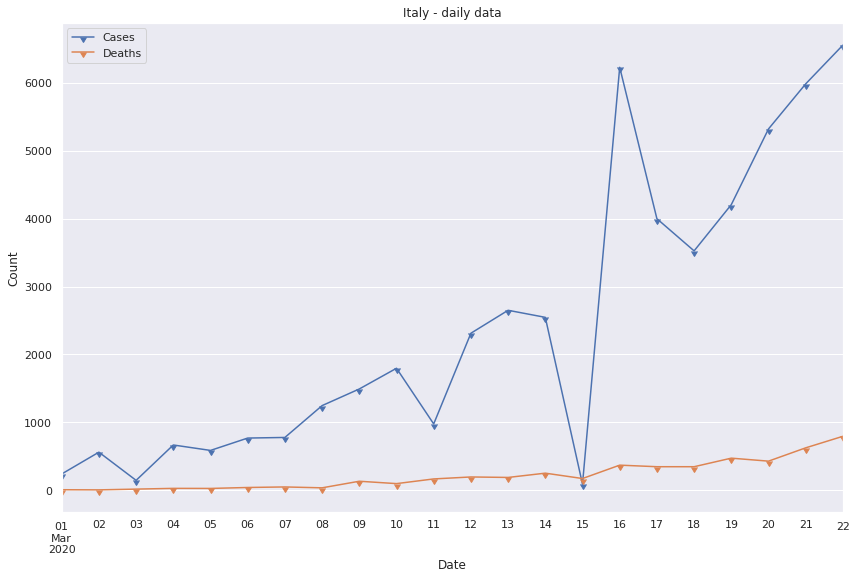

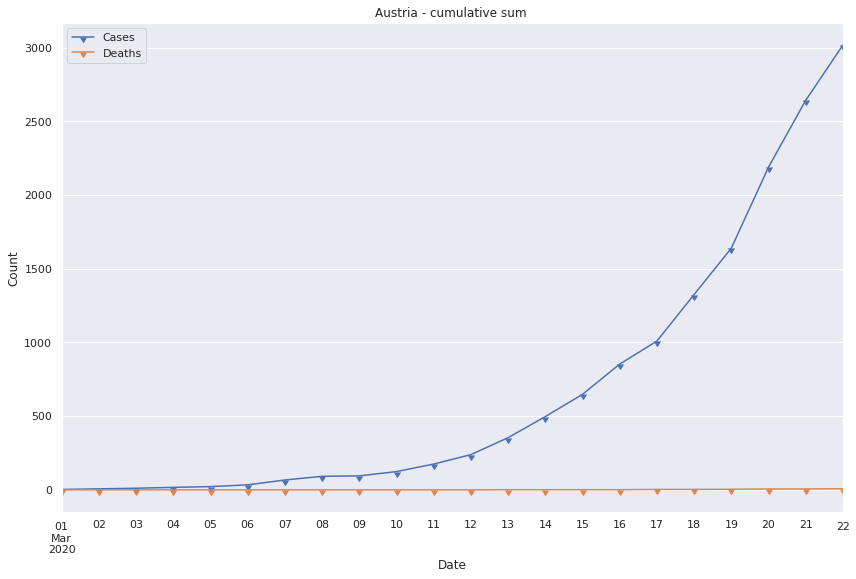

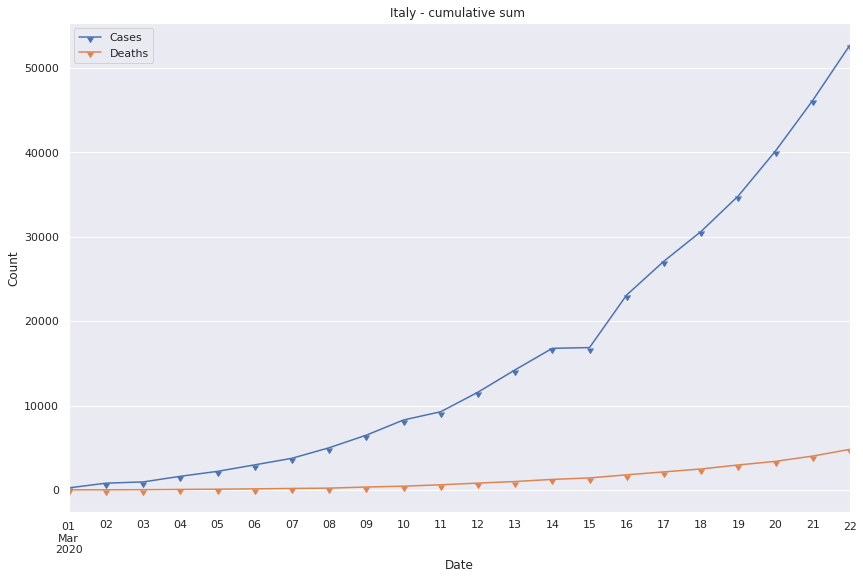

In [6]:
# ----------------------- Read file -----------------------
df_aut = df.loc[df['Countries and territories']=='Austria']
df_it = df.loc[df['Countries and territories']=='Italy']
df_aut = df_aut.sort_index(ascending=True)
df_it = df_it.sort_index(ascending=True)
df_aut_march = df_aut.loc['2020-03-01':'2020-03-22']
df_it_march = df_it.loc['2020-03-01':'2020-03-22']


ax = df_aut_march.plot(y=['Cases','Deaths'], grid=True, marker=11, figsize=(14,9))
ax.set_xlabel("Date")
ax.set_ylabel("Count")
ax.set_title("Austria - daily data")

ax = df_it_march.plot(y=['Cases','Deaths'], grid=True, marker=11, figsize=(14,9))
ax.set_xlabel("Date")
ax.set_ylabel("Count")
ax.set_title("Italy - daily data")

ax = df_aut_march.cumsum().plot(y=['Cases','Deaths'], grid=True, marker=11, figsize=(14,9))
ax.set_xlabel("Date")
ax.set_ylabel("Count")
ax.set_title("Austria - cumulative sum ")

ax = df_it_march.cumsum().plot(y=['Cases','Deaths'], grid=True, marker=11, figsize=(14,9))
ax.set_xlabel("Date")
ax.set_ylabel("Count")
ax.set_title("Italy - cumulative sum ")